This document just takes plain text results and formats the coefficient plot

In [1]:
import pandas as pd
import math
import matplotlib as mpl, matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 22})

india = {'coef': {0: -0.06610466080296476,
  1: 0.06849799459444841,
  2: 0.5335331625553397,
  3: 0.5061122454371987,
  4: -0.09464360766212288,
  5: 0.04517155707073757,
  6: 0.5200828292267733,
  7: 0.5239028533403469},
 'err': {0: 0.21713832128976837,
  1: 0.19253585369794615,
  2: 0.3913600809799527,
  3: 0.3566169104115723,
  4: 0.3140877019332967,
  5: 0.3129431098274066,
  6: 0.5489509021289611,
  7: 0.6109279426993857},
 'mod_name': {0: 'Poisson',
  1: 'Poisson w/ FE',
  2: 'Poisson',
  3: 'Poisson w/ FE',
  4: 'Poisson',
  5: 'Poisson w/ FE',
  6: 'Poisson',
  7: 'Poisson w/ FE'},
 'kind': {0: 'earliest',
  1: 'earliest',
  2: 'earliest',
  3: 'earliest',
  4: 'donut',
  5: 'donut',
  6: 'donut',
  7: 'donut'},
 'cat': {0: 'top_10',
  1: 'top_10',
  2: 'top_50',
  3: 'top_50',
  4: 'top_10',
  5: 'top_10',
  6: 'top_50',
  7: 'top_50'}}

turkey = {'coef': {0: 0.2899103413143197,
  1: 0.25818542098906716,
  2: 0.8999942968420489,
  3: 0.8229172930609775},
 'err': {0: 0.27256638713060155,
  1: 0.25478302801855796,
  2: 0.3080268901042966,
  3: 0.2786812993380047},
 'mod_name': {0: 'Poisson',
  1: 'Poisson w/ FE',
  2: 'Poisson',
  3: 'Poisson w/ FE'},
 'kind': {0: 'turkey', 1: 'turkey', 2: 'turkey', 3: 'turkey'},
 'cat': {0: 'top_10', 1: 'top_10', 2: 'top_50', 3: 'top_50'}}

In [2]:
coefs = pd.concat([pd.DataFrame.from_dict(turkey), pd.DataFrame.from_dict(india)])
coefs

,coef,err,mod_name,kind,cat
0,0.289910,0.272566,Poisson,turkey,top_10
1,0.258185,0.254783,Poisson w/ FE,turkey,top_10
2,0.899994,0.308027,Poisson,turkey,top_50
3,0.822917,0.278681,Poisson w/ FE,turkey,top_50
0,-0.066105,0.217138,Poisson,earliest,top_10
1,0.068498,0.192536,Poisson w/ FE,earliest,top_10
2,0.533533,0.391360,Poisson,earliest,top_50
3,0.506112,0.356617,Poisson w/ FE,earliest,top_50
4,-0.094644,0.314088,Poisson,donut,top_10
5,0.045172,0.312943,Poisson w/ FE,donut,top_10


In [3]:
def coefplot(coef_df, 
             hue="cat", 
             xaxis_ticks='kind', 
             offset=.2, 
             raw=False):
    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    coef_df = coef_df.copy() # avoid modifying the other thing
    
    if not raw:
        coef_df.loc[:, 'coef'] = coef_df.copy().coef.apply(lambda x: (math.exp(x) * 100) - 100)
        coef_df.loc[:, 'err'] = coef_df.copy().err.apply(lambda x: (math.exp(x) * 100) - 100)

    
    
    
    mask = coef_df[hue] == coef_df[hue].iloc[0]
    df1, df2 = coef_df[mask], coef_df[~mask]

    df1.loc[:, 'x_loc'] = range(len(df1.copy()))
    df2.loc[:, 'x_loc'] = [x + offset for x in range(len(df2.copy()))]
    
    
    for df, label in zip([df1, df2], coef_df[hue].unique()):
        plt.errorbar(df.x_loc, df.coef, yerr=df.err, fmt="o", elinewidth=5)
        plt.scatter(df.x_loc, df.coef, label=label, s=200)

    # X ticks 
    plt.xticks(
        ticks=[x + offset/2 for x in range(len(df1))],
        labels=df[xaxis_ticks], 
#         fontsize=20
    )
    
        
     # Set title & labels
#     plt.title('Estimates of Return to Trending', fontsize=30)
#     plt.ylabel('% Increase in Tweet Volume',fontsize=22)
#     plt.xlabel('',fontsize=22)
    

    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    plt.legend(title="Model Type", loc='upper right',
#                title_fontsize=16
              )
    return plt.show()


<ipython-input-5-d0bbcce8e672>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_formatted['kind'] = coefs_formatted.kind.map(kind_formatter)
<ipython-input-5-d0bbcce8e672>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_formatted['cat'] = coefs_formatted.cat.map(cat_formatter)


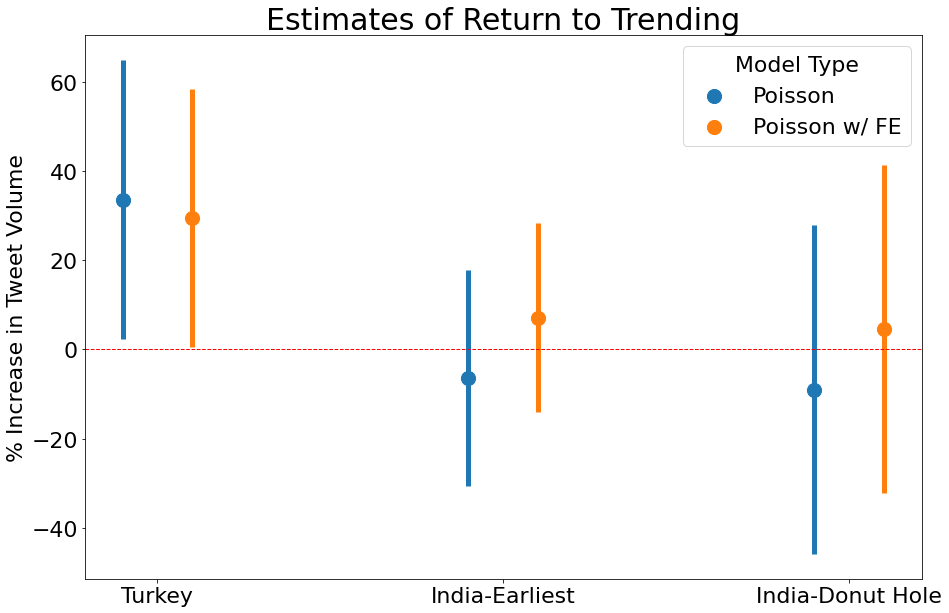

In [5]:
coefs_formatted = coefs.query('cat == "top_10"')

kind_formatter = {'turkey': 'Turkey', 'earliest': 'India-Earliest', 'donut': "India-Donut Hole"}
cat_formatter = {'top_10': 'Top 10', 'top_50': 'Top 50'}

coefs_formatted['kind'] = coefs_formatted.kind.map(kind_formatter)
coefs_formatted['cat'] = coefs_formatted.cat.map(cat_formatter)

coefplot(coefs_formatted, hue='mod_name')
# plt.savefig('/home/jschless/paper_figs/coef_plot.pdf')

In [49]:
def coefplot_2(coef_df, title, 
             xaxis_ticks='kind', 
             offset=.2, 
             raw=False):
    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(9,6))
    mpl.rcParams.update({'font.size': 22})

    
    coef_df = coef_df.copy() # avoid modifying the other thing
    
    if not raw:
        coef_df.loc[:, 'coef'] = coef_df.copy().coef.apply(lambda x: (math.exp(x) * 100) - 100)
        coef_df.loc[:, 'err'] = coef_df.copy().err.apply(lambda x: (math.exp(x) * 100) - 100)

    
    
    
    coef_df.loc[:, 'x_loc'] = range(len(coef_df.copy()))    
    
    plt.errorbar(coef_df.x_loc, coef_df.coef, yerr=coef_df.err, fmt="o", elinewidth=5)
    plt.scatter(coef_df.x_loc, coef_df.coef, s=200)

    # X ticks 
    plt.xticks(ticks=coef_df.x_loc, labels=coef_df[xaxis_ticks])
    
        
     # Set title & labels
#     plt.title('Estimates of Return to Trending (Top 10)', fontsize=30)
    plt.ylabel('% Increase in Tweet Volume')
    plt.xlabel('')
    

    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    plt.title(title)

#     plt.legend(title="Model Type", loc='upper right',
#                title_fontsize=16
#               )

<ipython-input-50-8fc1bf42f723>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_formatted['kind'] = coefs_formatted.kind.map(kind_formatter)
<ipython-input-50-8fc1bf42f723>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_formatted['cat'] = coefs_formatted.cat.map(cat_formatter)


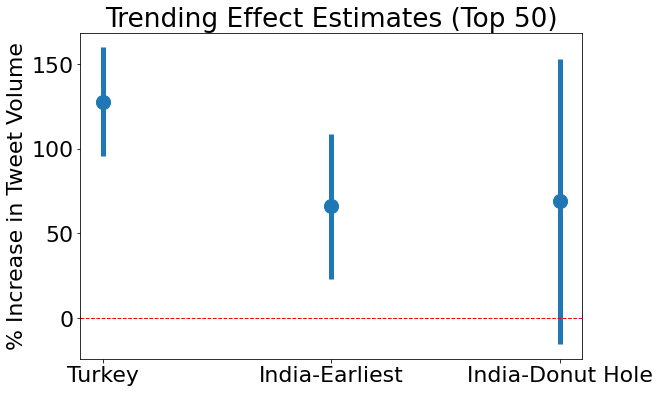

In [50]:
coefs_formatted = coefs.query('cat == "top_50" and mod_name == "Poisson w/ FE"')

kind_formatter = {'turkey': 'Turkey', 'earliest': 'India-Earliest', 'donut': "India-Donut Hole"}
cat_formatter = {'top_10': 'Top 10', 'top_50': 'Top 50'}

coefs_formatted['kind'] = coefs_formatted.kind.map(kind_formatter)
coefs_formatted['cat'] = coefs_formatted.cat.map(cat_formatter)
coefplot_2(coefs_formatted, 'Trending Effect Estimates (Top 50)')
plt.savefig('/home/jschless/paper_figs/coef_plot_top_50.pdf')

<ipython-input-51-cc17aa8b8304>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_formatted['kind'] = coefs_formatted.kind.map(kind_formatter)
<ipython-input-51-cc17aa8b8304>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_formatted['cat'] = coefs_formatted.cat.map(cat_formatter)


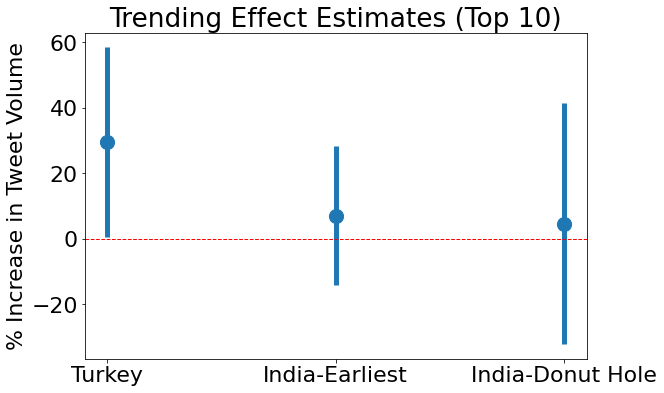

In [51]:
coefs_formatted = coefs.query('cat == "top_10" and mod_name == "Poisson w/ FE"')

kind_formatter = {'turkey': 'Turkey', 'earliest': 'India-Earliest', 'donut': "India-Donut Hole"}
cat_formatter = {'top_10': 'Top 10', 'top_50': 'Top 50'}

coefs_formatted['kind'] = coefs_formatted.kind.map(kind_formatter)
coefs_formatted['cat'] = coefs_formatted.cat.map(cat_formatter)

coefplot_2(coefs_formatted, 'Trending Effect Estimates (Top 10)')
plt.savefig('/home/jschless/paper_figs/coef_plot_top10.pdf')